# Problem Set 3, due May 9th at 3:30pm.

### Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python!

*Also note:* For this assignment we are requiring you to use base **matplotlib** - no more Seaborn or other packages. This will help you become familiar with techniques for maintaining fine-grained control over your data visualizations. It will also help our graders, who spent countless hours trying to make various versions import for grading.

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).  Please read about the dataset carefully before continuing.  Use the following commands to load the dataset and print some descriptive information


In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [3]:
print (bdata.keys())
print (bdata.feature_names)
print (bdata.data.shape)
print (bdata.target.shape)
# uncomment the following if you want to see a lengthy description of the dataset
print (bdata.DESCR)


dict_keys(['target', 'data', 'DESCR', 'feature_names'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD 

In [4]:
#create a data frame
#save the data into easily accessible variable
data = pd.DataFrame(bdata.data)
target = pd.DataFrame(bdata.target)

#join data and target variable
data = pd.concat((data,target),axis=1)

#save the column names
cols = np.append(bdata.feature_names,'MEDV')

data.columns = cols

data.columns


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

---

## Part 1: Descriptive analysis

The goal of this section is to explore the data and make a few nice
visualizations -- before beginning the "real" work, we should dig into
the data a bit do see what we are dealing with.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.
  

### 1.1: Histogram of housing prices

Your first task is to make a histogram of 'MEDV' (the median hose
                                                  value, your target
                                                  variable), and make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


(array([  3.,   1.,   7.,  10.,   3.,  10.,   9.,   9.,  24.,  18.,  16.,
         16.,  22.,  25.,  37.,  36.,  31.,  35.,  37.,  25.,  11.,   8.,
          9.,  10.,  10.,   7.,   8.,   7.,   9.,   5.,   4.,   6.,   5.,
          1.,   1.,   0.,   2.,   2.,   3.,   2.,   1.,   2.,   0.,   3.,
         16.]),
 array([  5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,
         16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,
         27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,
         38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,
         49.,  50.]),
 <a list of 45 Patch objects>)

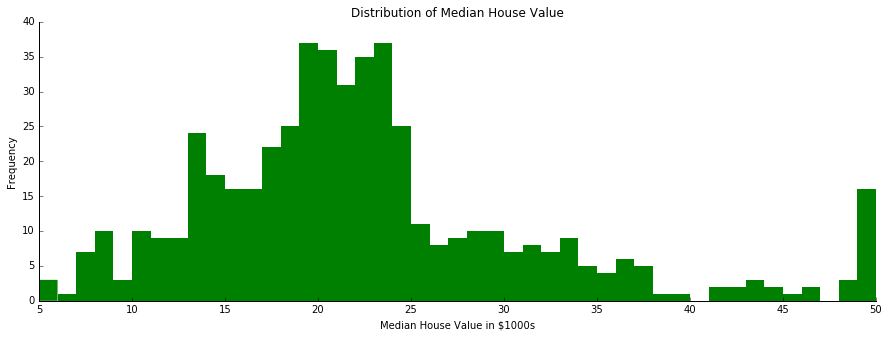

In [5]:
#set the figure size
plt.figure(figsize=(15,5))

#create a subplot
ax = plt.subplot(111)

#remove right and top border
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#keep left and bottom ticks
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#set the labels
plt.xlabel('Median House Value in $1000s')
plt.ylabel('Frequency')

#set title
plt.title('Distribution of Median House Value')

#plot the data
plt.hist(bdata.target, bins = int(bdata.target.max()-bdata.target.min()), color = 'g', lw =0)

### 1.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship
between the median value of the home (y-axis) and the per-capita crime
rate (x-axis).  Properly label your axes, and make sure that your
graphic looks polished and professional.  


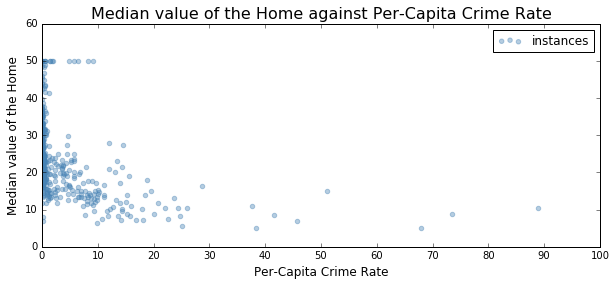

In [6]:
#set the plotsize
plt.figure(figsize=(10,4))

#set the limits of x-axis
plt.xlim(0,100)
plt.xticks(np.arange(min(data.CRIM), 101, 10))


#set the axis label
plt.xlabel('Per-Capita Crime Rate', fontsize= 12)
plt.ylabel('Median value of the Home',fontsize= 12)

#set the title
plt.title('Median value of the Home against Per-Capita Crime Rate', fontsize = 16)

#make the scatter plot
plt.scatter(data.CRIM,data.MEDV, alpha = 0.4, color = 'steelblue', marker='o', label = 'instances')

#show legend
plt.legend(loc = 'best')

### 1.3 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  

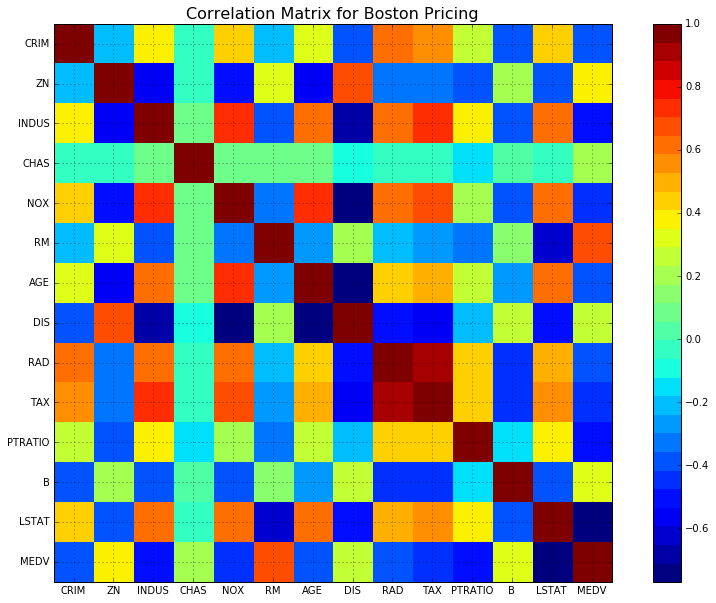

In [9]:
from matplotlib import cm as cm

#set the figure size
fig = plt.figure(figsize=(15,10))

#set the subplot
ax = fig.add_subplot(111)

#initialize color map
cmap = cm.get_cmap('jet', 30)

#create the correlation matrix matrix 
cax = ax.imshow(data.corr(), interpolation="nearest", cmap=cmap)

#set grids to true
ax.grid(True)

#set the title
plt.title('Correlation Matrix for Boston Pricing' , fontsize = 16)

#store the labels
labels=data.columns

#set labels
ax.set_xticklabels(labels,fontsize=10)
ax.set_yticklabels(labels,fontsize=10)

#show all features on the axis
ax.set_xticks(range(0,14))
ax.set_yticks(range(0,14))

# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, fraction = 0.045, pad = 0.05)

---

## Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

### 2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. 
Details of RMSE can be found in Hastie, Tibishrani, Friedman _The
Elements of Statistical Learning_, Ch 2.5.  (Available on the web)



The RMSE is given by $\sqrt( \frac {\sum_{i=1}^{n}  (\hat{y}_{i} - y_{i})^2} {n} )$

In [10]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print compute_rmse((2,2,3),(0,2,6)
2.08
"""
def compute_rmse(predictions,yvalues):
    #translate the formula above into python
    rmse = np.sqrt(((predictions-yvalues) ** 2).mean())
    
    #return the calculated value
    return rmse

In [11]:
#testing the function with random sample data
d = np.array([2, 2, 3])
p = np.array([0, 2, 6])

compute_rmse(d,p)

2.0816659994661326

### 2.2 Divide your data into training and testing datasets


Randomly select 66% of the data and put this in a training dataset
(call this "bdata_train"), and place the remaining 34% in a testing
dataset (call this "bdata_test").  Please us 'np.random' for random numbers.


In [157]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)

#generate indexes
indexes = np.random.choice(506,int(bdata.data.shape[0]*0.66),replace=False)

#create train with the random sample graph
bdata_train = data.ix[indexes,].reset_index()

#select rows not in index
bdata_test = data.ix[~data.index.isin(indexes),].reset_index()

### 2.3 Use a trivial baseline model for prediction, and compute RMSE
Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

In [159]:
#compute the mean value
baseline_train = bdata_train.MEDV.mean()

print("The baseline model results %.12f" % baseline_train)

#retrieve the RMSE value for the training model against baseline mean model
print("The RMSE for training dataset is %.12f" % compute_rmse(baseline_train,bdata_train.MEDV))

#retrieve the RMSE value for the test model against baseline mean model
print("The RMSE for test dataset is %.12f" % compute_rmse(baseline_train,bdata_test.MEDV))

The baseline model results 22.056756756757
The RMSE for training dataset is 8.584967883776
The RMSE for test dataset is 10.281671624777


- We sampled the data randomly, hence the RMSE value is for training and test dataset is somewhat close. The metric RMSE value is dependent on the study. Since our target variable is measured as a unit equivalent to 1000\$, the RMSE value of \$8.45k and \$9.95k is unacceptable in predicting the median value of the houses in Boston.

- The RMSE values was expected to be large because this is our baseline model which is simply based on the average of the median value. The baseline model was expected to perform terribly bad and hence such huge RMSE values.

- A reason for such difference could be because we are considering the mean of the train data.

## Part 3: Nearest Neighbors


### 3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average
Value" baseline that you computed above.  Soon you will implement the
Nearest Neighbor algorithm, but first you need to create a distance
metric to measure the distance (and similarity) between two instances.
Write a generic function to compute the Lp-Norm distance. Verify that
your function works by computing the L-2 (Euclidean) distance and L-1 (Manhattan) distance between the points (3,4) and (6,8), and between (6,8) and (3,4).  Ensure that your distance is correct and positive in both cases!


In [14]:
def distance(x1,x2,ln):
    """
    Function
    --------
    distance

    Given two instances and a value for L, return the L-Norm distance between them

    Parameters
    ----------
    x1, x2 : array
        Array of numerical values corresponding to predictions for each of the N observations

    L: int
        Value of L to use in computing distances

    Returns
    -------
    dist : int
        The L-norm distance between instances

    Example
    -------
    >>> print distance((3,4),(5,9),1)
    7

    """
    if ln == 1:
        #print("Calculating L-1 norm distance...")
        d = sum(abs(x1-x2))
        return d
    elif ln == 2:
        #print("Calculating L-2 norm distance...")
        d = np.sqrt( sum((x1-x2)**2) )
        return d
        

In [15]:
print("The distance L-1 is " ,distance(np.array([3,4]),np.array([6,8]),1))
print("The distance L-2 is " ,distance(np.array([3,4]),np.array([6,8]),2))

The distance L-1 is  7
The distance L-2 is  5.0


### 3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as
you know, with Nearest Neighbors there is no real training, you just
need to keep your training data in memory.  Write a function that
predicts, for each instance in the testing data (bdata_test), the
median home value using the nearest neighbor algorithm we discussed in
class.  Since this is a small dataset, you can simply compare your
test instance to every instance in the training set, and return the
MEDV value of the closest training instance.  You can just loop over
the instances to find the nearest neighbor.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

Plot the true vs predicted price for your test data


In [16]:
def bnn(train_data,test_data,predictors,target,l,k=1):  
    """
    function
    --------
    bnn is a function that predicts the median value of the house using the Basic Nearest Neighbor (i.e only one neighbour)
    
    inputs
    ------
    train_data : training data
    test_data  : test data
    predictors : list of the predictors that will be used in building model
    k          : number of neighbor, here k=1 
    l          : L norm distance parameter
    
    output
    ------
    predicted : predicted median value of the house
    
    """
    #create an empty list
    predicted = []
    
    #convert the df to matrix for faster execution
    train_data = (train_data.ix[:,predictors+target]).as_matrix()
    test_data = (test_data.ix[:,predictors]).as_matrix()
    
    #run through every instance in test data
    for i in range(0,test_data.shape[0]):
        #prepare a list that stores index for the smallest distance and the distance itself
        distances = [[x,distance(train_data[x,:(train_data.shape[1]-1)],test_data[i,:],l)] for x in range(0,train_data.shape[0])]
        
        #extract the index by sorting the list on the basis on the distances in ascending order
        nearest = (sorted(distances, key = lambda x:x[1]))[0]
        
        #extract the associated target value and append it in the final list of predicted values
        predicted.append(train_data[nearest[0],train_data.shape[1]-1])
    
    #return predicted values
    return predicted


In [17]:
#calculate the median value with features - 'CRIM','RM' and 'MEDV' as target, L-2 norm = Eucledian distance
pred_values =bnn(bdata_train,bdata_test,['CRIM','RM'],['MEDV'],2)

#print the RMSE value
print('The RMSE is %.8f'%compute_rmse(pred_values,bdata_test.MEDV))

The RMSE is 7.45009989


- Estimating the runtime of the algorithm

In [155]:
#time the execution with 10 loops and best of 3
%timeit -n 10 -r 3 pred_values =bnn(bdata_train,bdata_test,['CRIM','RM'],['MEDV'],2)

10 loops, best of 3: 795 ms per loop


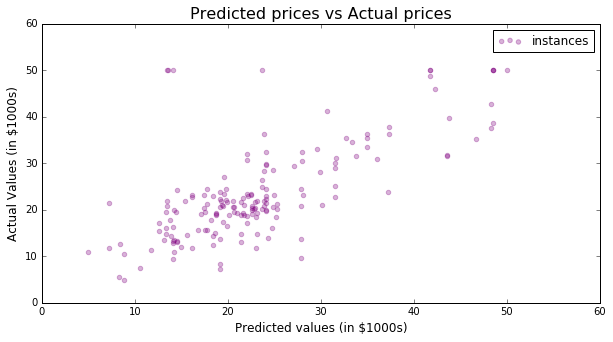

In [21]:
#plot the predicted vs actual prices

#set figure size
plt.figure(figsize=(10,5))

#set title
plt.title('Predicted prices vs Actual prices', fontsize = 16)

#set labels
plt.xlabel('Predicted values (in $1000s)',fontsize = 12)
plt.ylabel('Actual Values (in $1000s)',fontsize = 12)

#create a scatter plot
plt.scatter(pred_values,bdata_test.MEDV, color = 'purple', alpha = 0.3,label='instances')

#plot legend
plt.legend(loc='best')

### 3.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Normalization is similar to Mahalanobis disctance (if the features are independent).  Read more in Daume (2017), _A Course in Machine Learning_ Chapter 4.3.  Write a simple generic normalization function that takes as input an array of values for a given feature, and returns the normalized array.  Do it well, you will need it in the future as well ;-)

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

In [22]:
def normalize_feature(data_array):
    """
    function
    --------
    perform normalization on the basis of mean and standard deviation
    
    Input
    -----
    data_array: array of data to be normalized
    
    Output
    ------
    normalized dataset
    """
    #compute mean
    m = data_array.mean()
    
    #compute standard deviation
    s = data_array.std()
    
    #normalize the array
    norm_data_array = (data_array - m )/s
    
    #return normalized array
    return norm_data_array
    

In [23]:
#create an empty zero arrays
norm_bdata_train = np.zeros((bdata_train.shape[0],bdata_train.shape[1]))
norm_bdata_test = np.zeros((bdata_test.shape[0],bdata_test.shape[1]))

#normalize train-dataset
for i in range(1,bdata_train.shape[1]-1):
    norm_bdata_train[:,i] = normalize_feature(bdata_train.ix[:,i])

#normalize test-dataset
for i in range(1,bdata_test.shape[1]-1):
    norm_bdata_test[:,i] = normalize_feature(bdata_test.ix[:,i])

#append the median values
norm_bdata_train[:,norm_bdata_train.shape[1]-1] = bdata_train.MEDV
norm_bdata_test[:,norm_bdata_test.shape[1]-1] = bdata_test.MEDV

#convert back to dataframes, as normalized dataframes
norm_bdata_train = pd.DataFrame(norm_bdata_train[:,1:], columns = bdata_train.columns[1:])
norm_bdata_test = pd.DataFrame(norm_bdata_test[:,1:], columns = bdata_test.columns[1:])

#validation check
print('----NORMALIZED TRAIN DATA----')
print(norm_bdata_train.head(),'\n\n')
print('----NORMALIZED TEST DATA----')
print(norm_bdata_test.head())

----NORMALIZED TRAIN DATA----
       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0  2.314858 -0.499800  1.040405 -0.231594  1.664086 -0.594180  0.876706   
1 -0.414450 -0.499800 -0.058397 -0.231594 -0.524360 -0.080033 -0.853758   
2 -0.412056 -0.499800 -0.058397  4.304929 -0.524360 -0.609718 -0.459212   
3 -0.433354  2.880846 -1.385446 -0.231594 -1.265467  1.226524 -1.054492   
4 -0.256417 -0.499800  1.256946 -0.231594  0.487034  1.766096  0.821331   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  MEDV  
0 -0.941888  1.738266  1.574267  0.812968  0.393392  1.266359  10.5  
1  0.018084 -0.606175 -0.772459  0.067316  0.416113 -0.469570  25.0  
2 -0.117102 -0.606175 -0.772459  0.067316  0.388076  0.431355  22.4  
3  1.571067 -0.840620 -0.458758 -2.728879  0.006292 -0.587679  30.3  
4 -0.893548 -0.488953 -0.012337 -1.750211  0.215997 -1.532552  50.0   


----NORMALIZED TEST DATA----
       CRIM        ZN     INDUS      CHAS       NOX        RM      

- Re-running the Basic Nearest Neighbour with feature CRIM and RM, using Eucledian distance

In [24]:
#calculate the median value with features - 'CRIM','RM' and 'MEDV' as target, L-2 norm = Eucledian distance
pred_values =bnn(norm_bdata_train,norm_bdata_test,['CRIM','RM'],['MEDV'],l=2)

#print the RMSE value
print('The RMSE is %.8f'%compute_rmse(pred_values,norm_bdata_test.MEDV))

The RMSE is 7.74269001


### 3.4 Optimization


A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!  

What combination of features and distance function provide the lowest RMSE?  Compre RMSEs with the corresponding true-predicted plots.

Do your decisions affect the running time of the algorithm?

In [25]:
'''
6 - AGE      proportion of owner-occupied units built prior to 1940
11 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
9 - TAX      full-value property-tax rate per $10,000
3 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5 - NOX      nitric oxides concentration (parts per 10 million)
'''

'\n6 - AGE      proportion of owner-occupied units built prior to 1940\n11 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\n9 - TAX      full-value property-tax rate per $10,000\n3 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n5 - NOX      nitric oxides concentration (parts per 10 million)\n'

In [40]:
#calculate the median value with features - 'CRIM','RM','AGE' and 'MEDV' as target, L-2 norm = Eucledian distance
%timeit -n 10 pred_values_age =bnn(norm_bdata_train,norm_bdata_test,['CRIM','RM','AGE'],['MEDV'],l=2)

rmse_values_age = compute_rmse(pred_values_age,norm_bdata_test.MEDV)
#print the RMSE value
print('The RMSE is %.8f'%rmse_values_age)

10 loops, best of 3: 3 s per loop
The RMSE is 7.70750329


In [41]:
#calculate the median value with features - 'CRIM','RM','AGE','CHAS' and 'MEDV' as target, L-2 norm = Eucledian distance
%timeit -n 10 pred_values_age_chas =bnn(norm_bdata_train,norm_bdata_test,['CRIM','RM','AGE','CHAS'],['MEDV'],l=2)

rmse_values_age_chas = compute_rmse(pred_values_age_chas,norm_bdata_test.MEDV)
#print the RMSE value
print('The RMSE is %.8f'%rmse_values_age_chas)

10 loops, best of 3: 2.93 s per loop
The RMSE is 6.79957071


In [42]:
#calculate the median value with features - 'CRIM','RM','AGE','NOX' and 'MEDV' as target, L-2 norm = Eucledian distance
%timeit -n 10 pred_values_age_nox =bnn(norm_bdata_train,norm_bdata_test,['CRIM','RM','AGE','NOX'],['MEDV'],l=1)

rmse_values_age_nox= compute_rmse(pred_values_age_nox,norm_bdata_test.MEDV)

#print the RMSE value
print('The RMSE is %.8f'%rmse_values_age_nox)

10 loops, best of 3: 1.81 s per loop
The RMSE is 7.76538934


In [43]:
#calculate the median value with features - 'CRIM','RM','CHAS' and 'MEDV' as target, L-1 norm = Manhattan distance
%timeit -n 10 pred_values_chas =bnn(norm_bdata_train,norm_bdata_test,['CRIM','RM','CHAS'],['MEDV'],l=1)

rmse_values_chas = compute_rmse(pred_values_chas,norm_bdata_test.MEDV)

#print the RMSE value
print('The RMSE is %.8f'%rmse_values_chas)

10 loops, best of 3: 1.68 s per loop
The RMSE is 6.94676704


In [44]:
#calculate the median value with features - 'CRIM','RM','TAX','AGE' and 'MEDV' as target, L-1 norm = Manhattan distance
%timeit -n 10 pred_values_tax_age =bnn(norm_bdata_train,norm_bdata_test,['CRIM','RM','TAX','AGE'],['MEDV'],l=1)

rmse_values_tax_age = compute_rmse(pred_values_tax_age,norm_bdata_test.MEDV)
#print the RMSE value
print('The RMSE is %.8f'%rmse_values_tax_age)

10 loops, best of 3: 1.68 s per loop
The RMSE is 7.69738714


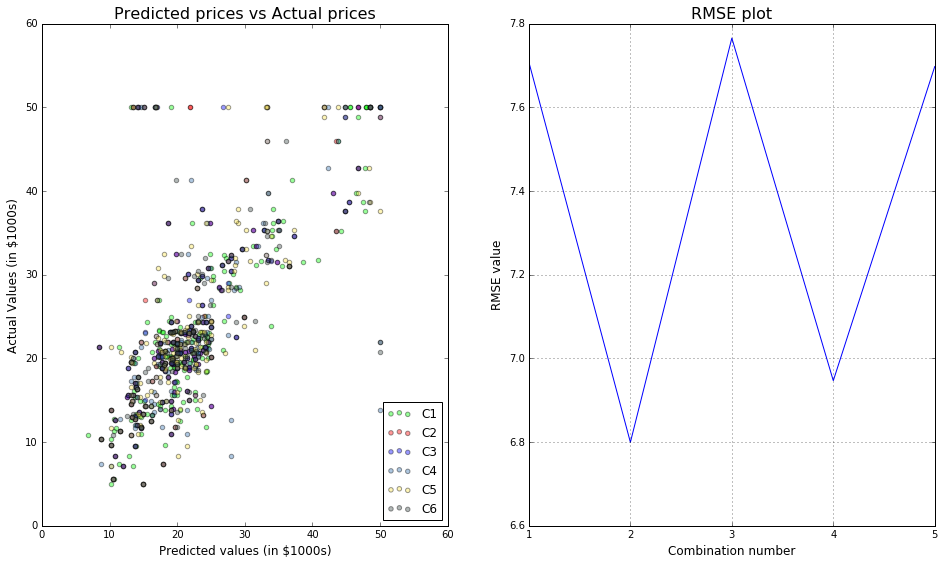

In [163]:
#true vs predicted plots
plt_fig = plt.figure(figsize=(16,9))

#create subplot that plots predicted values vs true values for combinations
ax = plt_fig.add_subplot(121)

#plot every combination
ax.scatter(pred_values, bdata_test.MEDV, c='#00FF00',alpha = 0.4, marker="o", label='C1')
ax.scatter(pred_values_age,bdata_test.MEDV, c='#FF0000',alpha = 0.4, marker="o", label='C2')
ax.scatter(pred_values_age_chas,bdata_test.MEDV, c='#0000FF',alpha = 0.4, marker="o", label='C3')
ax.scatter(pred_values_age_nox,bdata_test.MEDV, c='#3574B2',alpha = 0.4, marker="o", label='C4')
ax.scatter(pred_values_chas,bdata_test.MEDV, c='#FDE74C',alpha = 0.4, marker="o", label='C5')
ax.scatter(pred_values_tax_age,bdata_test.MEDV, c='#404E4D',alpha = 0.4, marker="o", label='C6')

#set title
plt.title('Predicted prices vs Actual prices', fontsize = 16)

#set labels
plt.xlabel('Predicted values (in $1000s)',fontsize = 12)
plt.ylabel('Actual Values (in $1000s)',fontsize = 12)

plt.legend(loc='lower right');

rmse_values = [rmse_values_age,rmse_values_age_chas,rmse_values_age_nox,rmse_values_chas,rmse_values_tax_age]

#subplot 2. for RMSE comparison
ax2 = plt_fig.add_subplot(122)

#set title
plt.title('RMSE plot',fontsize = 16)

#set labels
plt.xlabel('Combination number',fontsize = 12)
plt.ylabel('RMSE value',fontsize = 12)
ax2.plot([1,2,3,4,5],rmse_values)#, width = 0.3)
ax2.set_xticks([1,2,3,4,5])

#show grid
plt.grid()


- We can see that for the combination of CRIM, RM, AGE and CHAS features we obtain the least RMSE = 6.79957071
- For some combinations when we add features that has more number of possible values such as age, the algorithm tends to run slow. Again, the run-time sporadically changes. It is not constant across runs. 

### 3.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see Daume (2017) _A Course in Machine Learning_, Ch 4.6).  Here you must implement a simple k-fold cross-validation algorithm yourself.  Essentially you have to partition your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in K-fold iterator -- do *not* use that here.)

Use Euclidean distance with CRIM and RM (0 and 5) as features.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations, and the total running time for all 10 iterations.  Compare the k-fold RMSE with the training-testing split RMSE above for the same hyperparameter values.

In [49]:
def perform_kfolds_validation (data,nfolds,neighbors,features,target,l,helper):
    """
    function
    --------
    divides the dataset into nfolds folds and performs the nearest neighbor algorithm
    
    input
    -----
    data   : dataset
    nfolds : number of folds
    
    output
    ------
    list of RMSE values for each iteration
    """
    nrows = data.shape[0]
    #determine the size of each fold
    set_nrows = np.floor(nrows/nfolds)
    #print('Each training set has %d' % set_nrows)
    #print('Test set has %d' % (set_nrows+(nrows%nfolds)))
    
    #get all the indexes
    indexes = np.array(data.index)
    
    #shuffle the order
    np.random.shuffle(indexes)
     
    rmses = []
    
    #partition the dataset into nfolds -1 for training sets. Append each fold in the list
    for i in range(0,nfolds):
        #start index
        start_ind = int(i*set_nrows)
        #end index
        end_ind = int(start_ind + set_nrows)
        if helper:
            print('--------------------------------------------------')
            print("Iteration : ",i+1," ---START---", start_ind ,"---END---",end_ind)
        test_indexes = indexes[start_ind:end_ind]
        test_data = data.ix[test_indexes,:]
        train_data = data.ix[~data.index.isin(test_indexes),:]
        if helper:
            print("Train :" , train_data.shape[0], "Test :", test_data.shape[0])
        p_val = knn(train_data,test_data,features,target,l,neighbors)
        rmse = compute_rmse(p_val,test_data.MEDV)
        if helper:
            print('RMSE :', rmse)
        rmses.append(rmse)
    #print("Partition : ",nfolds," ---START---", end_ind+1 ,"---END---",indexes.shape[0])
    #folds.append(data.ix[indexes[end_ind]:,:])
    
    return rmses
    

In [50]:
#create kfolds
rmses = perform_kfolds_validation(data,10,1,['CRIM','RM'],['MEDV'],2,True)

print('Average RMSE values',np.mean(rmses))

--------------------------------------------------
Iteration :  1  ---START--- 0 ---END--- 50
Train : 456 Test : 50
RMSE : 7.86351066636
--------------------------------------------------
Iteration :  2  ---START--- 50 ---END--- 100
Train : 456 Test : 50
RMSE : 8.26442980489
--------------------------------------------------
Iteration :  3  ---START--- 100 ---END--- 150
Train : 456 Test : 50
RMSE : 9.61934509205
--------------------------------------------------
Iteration :  4  ---START--- 150 ---END--- 200
Train : 456 Test : 50
RMSE : 4.45102235447
--------------------------------------------------
Iteration :  5  ---START--- 200 ---END--- 250
Train : 456 Test : 50
RMSE : 7.07679305901
--------------------------------------------------
Iteration :  6  ---START--- 250 ---END--- 300
Train : 456 Test : 50
RMSE : 4.71332154643
--------------------------------------------------
Iteration :  7  ---START--- 300 ---END--- 350
Train : 456 Test : 50
RMSE : 6.91942194117
------------------------

- Estimating run-time

In [164]:
%timeit -n 10 rmses = perform_kfolds_validation(data,10,1,['CRIM','RM'],['MEDV'],2,False)

10 loops, best of 3: 2.86 s per loop


### 3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [51]:
def knn(train_data,test_data,predictors,target,l,k):  
    """
    function
    --------
    bnn is a function that predicts the median value of the house using the Basic Nearest Neighbor (i.e only one neighbour)
    
    inputs
    ------
    train_data : training data
    test_data  : test data
    predictors : list of the predictors that will be used in building model
    k          : number of neighbor
    l          : L norm distance parameter
    
    output
    ------
    predicted : predicted median value of the house
    
    """
    #create an empty list
    predicted = []
    
    #convert the df to matrix for faster execution
    train_data = (train_data.ix[:,predictors+target]).as_matrix()
    test_data = (test_data.ix[:,predictors]).as_matrix()
    
    #run through every instance in test data
    for i in range(0,test_data.shape[0]):
        #prepare a list that stores index for the smallest distance and the distance itself
        distances = [[x,distance(train_data[x,:(train_data.shape[1]-1)],test_data[i,:],l)] for x in range(0,train_data.shape[0])]
        
        #extract the index by sorting the list on the basis on the distances in ascending order
        nearest = (sorted(distances, key = lambda x:x[1]))
        
        kneighbours = []
        for j in nearest[:k]:
            #print('For i: ',i, 'j : ',train_data[j[0],train_data.shape[1]-1])
            kneighbours.append(train_data[j[0],train_data.shape[1]-1])
        
        #extract the associated target value and append it in the final list of predicted values
        predicted.append(np.mean(kneighbours))
        
    return predicted


In [52]:
#calculate the median value with features - 'CRIM','RM' and 'MEDV' as target, L-2 norm = Eucledian distance, k = 3
pred_values = knn(bdata_train,bdata_test,['CRIM','RM'],['MEDV'],2,3)

rmse = compute_rmse(pred_values, bdata_test.MEDV)

print('The RMSE is %.8f'%rmse)

The RMSE is 6.70820345


- Estimating run-time for k-NN algorithm

In [165]:
%timeit -n 10 pred_values = knn(bdata_train,bdata_test,['CRIM','RM'],['MEDV'],2,3)

10 loops, best of 3: 720 ms per loop


### 3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

In [54]:
'''
CRIM - 0
ZN - 1
RM - 5
AGE - 6
DIS - 7
TAX - 9
'''
#merge normalized datasets
norm_data = pd.concat([norm_bdata_train,norm_bdata_test],axis=0).reset_index()

In [56]:
rmses = []
for k in range(1,26):
    #use normalized data 10-folds and k neighors. Features
    r = perform_kfolds_validation(data = norm_data,nfolds = 10,neighbors = k, features = ['CRIM','RM','ZN','AGE','DIS','TAX'],
                              target = ['MEDV'],l = 2,helper = False)
    r = np.mean(r)
    print('Neighbors : ', k ,'RMSE : ',r)
    rmses.append(r)

Neighbors :  1 RMSE :  6.05082374843
Neighbors :  2 RMSE :  5.14327269927
Neighbors :  3 RMSE :  5.01501462332
Neighbors :  4 RMSE :  4.94344121851
Neighbors :  5 RMSE :  5.19738100352
Neighbors :  6 RMSE :  5.2137125247
Neighbors :  7 RMSE :  5.17469209064
Neighbors :  8 RMSE :  5.20396830857
Neighbors :  9 RMSE :  5.1978583001
Neighbors :  10 RMSE :  5.21898624701
Neighbors :  11 RMSE :  5.22984270228
Neighbors :  12 RMSE :  5.3046929506
Neighbors :  13 RMSE :  4.99513177378
Neighbors :  14 RMSE :  5.37626442385
Neighbors :  15 RMSE :  5.20880280599
Neighbors :  16 RMSE :  5.23517085478
Neighbors :  17 RMSE :  5.3548514043
Neighbors :  18 RMSE :  5.30833677274
Neighbors :  19 RMSE :  5.23554071146
Neighbors :  20 RMSE :  5.35333129482
Neighbors :  21 RMSE :  5.35745902022
Neighbors :  22 RMSE :  5.37828410244
Neighbors :  23 RMSE :  5.37927541541
Neighbors :  24 RMSE :  5.34007547059
Neighbors :  25 RMSE :  5.33106871322


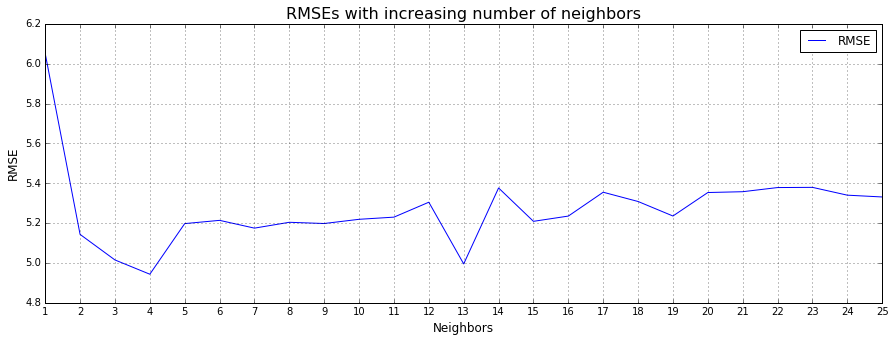

In [62]:
plt.figure(figsize=(15,5))
plt.title('RMSEs with increasing number of neighbors', fontsize = 16)
plt.xlabel('Neighbors', fontsize = 12)
plt.ylabel('RMSE', fontsize = 12)
plt.xticks(range(1,26))
plt.grid()
plt.plot(range(1,26),rmses, label = 'RMSE')
plt.legend()

- The RMSE values decreases with increasing number of neighbors. This phenomena occurs upto 4 neighbors, where the RMSE is the least. After that, the RMSEs keeps on increasing, except for 13 neighbors.
- Based on the values of RMSEs for each number of neighbors we add, 4 neighbors is a reasonable value. 

### Extra-Credit: Forward selection

Thus far the choice of predictor variables has been rather arbitrary. For extra credit, implement a basic [forward selection](http://www.stat.ubc.ca/~rollin/teach/643w04/lec/node41.html) algorithm to progressively include features that decrease the cross-validated RMSE of the model. Note that the optimal value of K may be different for each model, so you may want to use cross-validation to choose K each time (but it is also fine if you fix K at the optimal value from 2.7).  Create a graph that shows RMSE as a function of the number of features in the model. Label each point on the x-axis with the name of the feature that is added at that step in the forward selection algorithm. *(For instance, if the optimal single-feature model has CRIM with RMSE = 10, and the optimal two-feature model has CRIM+ZN with RMSE=9, the first x-axis label will say CRIM and the second x-axis lable with say ZN)*

- For performing forward selection, I will use 4 neighbors, perform 10 folds cross validation

In [212]:
#get all features labels
f_labels = norm_data.columns

#remove index
f_labels = f_labels[1:-1]

#view features
print(f_labels)

#do not consider target variables in counting 
nfeatures = len(f_labels)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [217]:
#store step RMSEs
fwd_rmses = []

#store predictors
predictors = []

#store RMSEs for each round
round_rmse = []

#feature set difference
remaining_features = []

#exhuast all features 
for i in range(0,nfeatures):
    
    #get the set difference
    remaining_features = f_labels.difference(predictors)
    
    #show the remaining features
    print('Remaining features: ',[x for x in remaining_features])
    
    print('Searching for next best combination .... ..... ....')
    #test for the optimal combination with previous feature
    for j in remaining_features:
        
        #test for RMSEs
        rmses = perform_kfolds_validation(data = norm_data,nfolds = 10,neighbors = 4, features = [j]+predictors,
                              target = ['MEDV'],l = 2,helper = False) 
        #mean of RMSEs from 10-fold
        rmses = np.mean(rmses)
        #print('RMSE for feature(s): ',[j]+predictors, ' - ',rmses)
        
        #append to test minimum RMSE yielding feature
        round_rmse.append([j,rmses])
    
    #get the feature that produces lowest RMSE with previous feature
    lowest_score = sorted(round_rmse, key = lambda x:x[1])[0]
    print('Lowest RMSE: ',lowest_score[0], ' with value :',lowest_score[1])
    
    #if selecting the first feature
    if i == 0:
        print('Add feature :',[lowest_score[0]] )
        fwd_rmses.append([lowest_score[0],lowest_score[1]]) 
        predictors.append(lowest_score[0])
    #if the combination yeilds lower RMSE than the previous one
    elif lowest_score[1] < fwd_rmses[-1][1]:
        print('Add feature :',[lowest_score[0]] )
        fwd_rmses.append([lowest_score[0],lowest_score[1]]) 
        predictors.append(lowest_score[0])
    #if no feature gives the best combination then stop trying
    else:
        print('No other feature yields lower RMSE')
        break
print('==================================================================================================')
print('End of Forward Feature Selection')
            

Remaining features:  ['AGE', 'B', 'CHAS', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO', 'RAD', 'RM', 'TAX', 'ZN']
Searching for next best combination .... ..... ....
Lowest RMSE:  LSTAT  with value : 5.7177354615
Add feature : ['LSTAT']
Remaining features:  ['AGE', 'B', 'CHAS', 'CRIM', 'DIS', 'INDUS', 'NOX', 'PTRATIO', 'RAD', 'RM', 'TAX', 'ZN']
Searching for next best combination .... ..... ....
Lowest RMSE:  RM  with value : 4.85228175974
Add feature : ['RM']
Remaining features:  ['AGE', 'B', 'CHAS', 'CRIM', 'DIS', 'INDUS', 'NOX', 'PTRATIO', 'RAD', 'TAX', 'ZN']
Searching for next best combination .... ..... ....
Lowest RMSE:  CRIM  with value : 4.07738524397
Add feature : ['CRIM']
Remaining features:  ['AGE', 'B', 'CHAS', 'DIS', 'INDUS', 'NOX', 'PTRATIO', 'RAD', 'TAX', 'ZN']
Searching for next best combination .... ..... ....
Lowest RMSE:  NOX  with value : 3.95989654612
Add feature : ['NOX']
Remaining features:  ['AGE', 'B', 'CHAS', 'DIS', 'INDUS', 'PTRATIO', 'RAD', 'TAX', 'ZN']

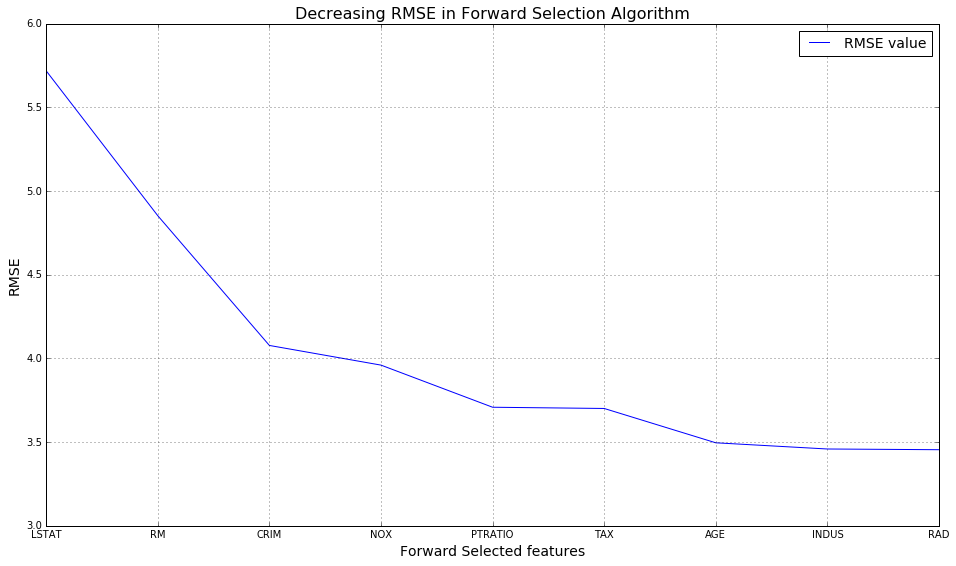

In [218]:
#set figure size
plt.figure(figsize=(16,9))

#set subplot
ax = plt.subplot(111)

#set title
plt.title('Decreasing RMSE in Forward Selection Algorithm', fontsize= 16)

#set X-axis
ax.set_xticks(range(0,len(fwd_rmses)))
ax.set_xticklabels([x[0] for x in fwd_rmses])
ax.set_xlabel('Forward Selected features',fontsize=14)

#set Y-axis
ax.set_ylabel('RMSE',fontsize = 14)

#plot rmses 
plt.plot([x[1] for x in fwd_rmses], label= 'RMSE value')

#show grid
plt.grid()

#show legend
plt.legend(loc = 'upper right', fontsize=14)